# Generation of facies models conditioned to 4 wells using U-Net GAN
<p> <b \>
<p>This is the code for the paper "U-Net GAN for subsurface facies modeling".
<p>In this paper, we proposed and implemented the U-Net GAN framework to generate facies models conditioned to some extra data.
<p>Here is the script to generate facies models conditioned to 4 wells.

In [1]:
# import python modules.

import torch
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# import the generator and load trained parameters.

from conditional_UNet_GAN_model import cGenerator

G = cGenerator()
G.load_state_dict(torch.load('./GAN_generator_in_epoch114.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
# specify the conditioning well location.
# In this case the well is in the 5th, 30th, 50th and 75th column.

wells = [5, 30, 50, 75]

In [5]:
# define a function to process the output image as we illustrated in the paper.

def image(mask, z):
    img = G(mask, z).view(-1, 80, 100).detach().numpy()
    img = (img + 1)/2
    img = np.where(img<0.5, 0, 1)
    return img

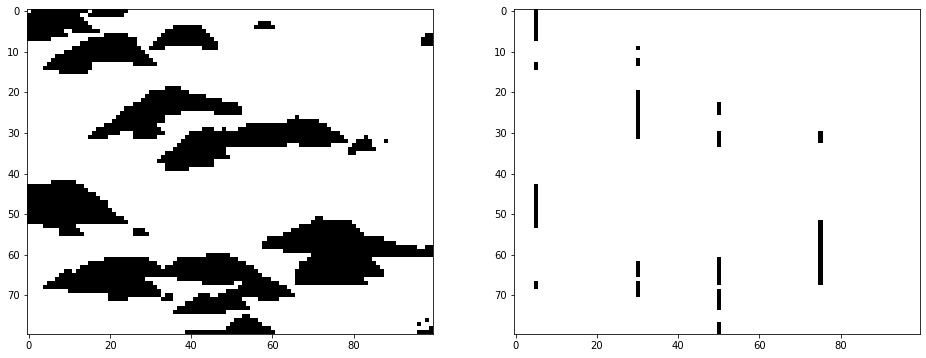

In [6]:
# randomly read an image from the dataset and extract conditioning data.

index = np.random.randint(0, 100)
real_image = plt.imread('../../part of the training dataset/Facies{}.png'.format(index))[:,:, 0].reshape(80, 100)
mask = np.ones_like(real_image)
for _ in range(len(wells)):
    mask[:,wells[_]] = real_image[:,wells[_]]

fig=plt.figure(figsize=(16, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(real_image, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')

In [7]:
# transform the conditioning data to the format following the structure of U-Net Generator.

mask_ge = torch.from_numpy(mask).reshape(1, 1, 80, 100)
mask_ge = (mask_ge - 0.5)/0.5

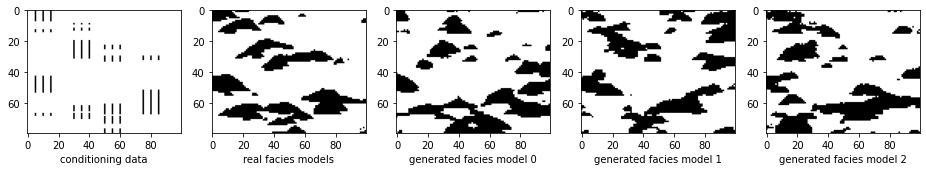

In [8]:
# generate some samples and compare them with the real one

z = torch.randn(3, 100)
imgs = image(mask_ge.expand(3, 1, 80, 100), z)

mask_draw = mask.copy()
for i in range(3):
    for j in range(len(wells)):
        mask_draw[:,wells[j]+5*i] = imgs[i,:,wells[j]]

fig=plt.figure(figsize=(16, 20))
fig.add_subplot(1, 5, 1)
plt.imshow(mask_draw, cmap='gray')
plt.xlabel('conditioning data')
fig.add_subplot(1, 5, 2)
plt.imshow(real_image, cmap='gray')
plt.xlabel('real facies models')
for i in range(3):
    fig.add_subplot(1, 5, 3+i)
    plt.imshow(imgs[i], cmap='gray')
    plt.xlabel('generated facies model {}'.format(i))

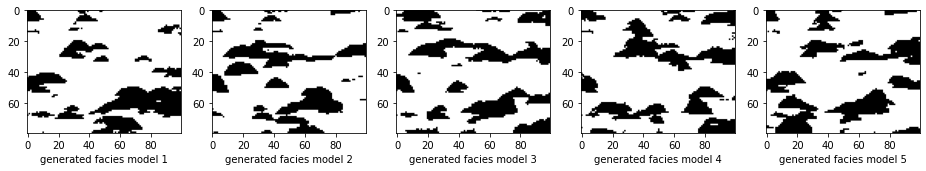

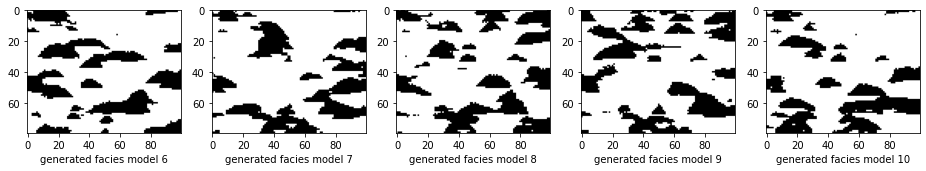

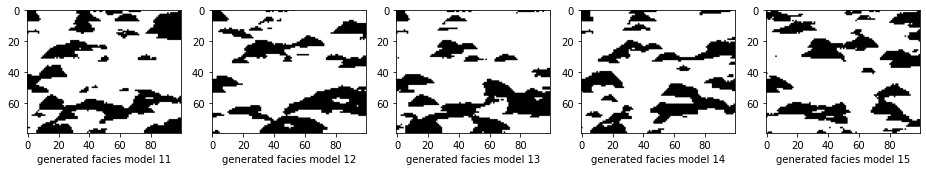

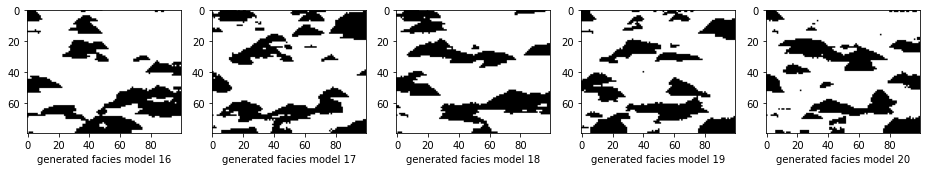

In [9]:
# generate random images

z = torch.randn(20, 100)
mask_ge = mask_ge.expand(20, 1, 80, 100)
imgs = image(mask_ge, z).reshape(-1, 80, 100)
for i in range(4):
    fig=plt.figure(figsize=(16, 20))
    for j in range(5):
        index = 5*i+j
        fig.add_subplot(1, 5, j+1)
        plt.imshow(imgs[index].reshape(80, 100), cmap='gray')
        plt.xlabel('generated facies model {}'.format(index + 1))
    plt.show()

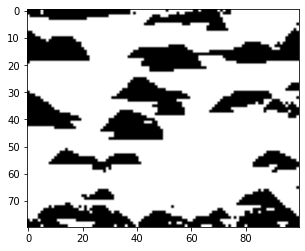

In [15]:
# save some images.

plt.imshow(imgs[0], cmap='gray')
plt.imsave('./U-Net GAN conditioned to 4 wells.png', imgs[0], cmap='gray')